In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 14.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!ffmpeg -i test.mp4 -vf format=gray gray.mp4

In [ ]:
!unzip drive/MyDrive/f.zip

Archive:  drive/MyDrive/f.zip
  inflating: 17_G_1623593016.2441733.pt  
  inflating: 11_G_1623586219.6545973.pt  
  inflating: 13_G_1623588456.3293748.pt  
  inflating: 18_G_1623594149.417595.pt  
  inflating: 14_G_1623589595.1418877.pt  
  inflating: 15_G_1623590736.230504.pt  
  inflating: 19_G_1623595289.1398213.pt  
  inflating: 10_G_1623585157.7964432.pt  
  inflating: 9_G_1623584122.1996632.pt  
  inflating: 12_G_1623587323.4433503.pt  
  inflating: 16_G_1623591874.1691759.pt  


In [ ]:
import os
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
from skimage.color import rgb2lab, lab2rgb

import torch
from torch import nn, optim
from torchvision import transforms
from torchvision.models.resnet import resnet18
from torch.utils.data import Dataset, DataLoader

from fastai.vision.learner import create_body
from fastai.vision.models.unet import DynamicUnet
from fastai.data.external import untar_data, URLs

In [ ]:
SIZE = 256

In [ ]:
def build_generator(n_inputs, n_outputs, core):
  body = create_body(core, n_inputs, True, -2)

  return DynamicUnet(body, n_outputs, (SIZE, SIZE))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def lab_to_rgb(L, ab):
    L = (L + 1.) * 50.
    ab = ab * 110.
    Lab = torch.cat([L, ab], dim=1).permute(0, 2, 3, 1).cpu().numpy()
    rgb_imgs = []
    for img in Lab:
        img_rgb = lab2rgb(img)
        rgb_imgs.append(img_rgb)
    return np.stack(rgb_imgs, axis=0)

In [ ]:
G = build_generator(1, 2, resnet18).to(device)

G.load_state_dict(torch.load("14.pt", map_location=device))

<All keys matched successfully>

In [ ]:
print(G)

In [ ]:
import cv2

source = cv2.VideoCapture('videoplayback.mp4')
idx = 0
ret = True

while ret:
    ret, img = source.read()
    idx += 1
    t = 2*(transforms.ToTensor()(img))[0] - 1
    t = torch.unsqueeze(torch.unsqueeze(t, 0), 0).to(device)
    ab = G(t)
    rgb = (255*lab_to_rgb(t, ab.detach())[0]).astype(np.uint8)

    out_img = Image.fromarray(rgb, "RGB")
    out_img.save(f"./his/{idx}_out.jpg")
  
    key = cv2.waitKey(1)
    if key == ord("q"):
        break

cv2.destroyAllWindows()
source.release()

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 3 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


TypeError: ignored

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


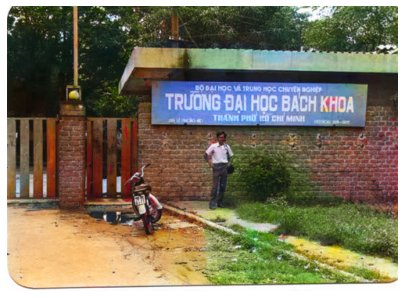

In [ ]:

img = Image.open("6a.jpg")

t = 2*(transforms.ToTensor()(img))[0] - 1
t = t.view(1, 1, *t.shape).to(device)

ogan = G(t)

outimggan = lab_to_rgb(t, ogan.detach())[0]

plt.figure(figsize=(7, 7))
plt.axis("off")
plt.imshow(outimggan)

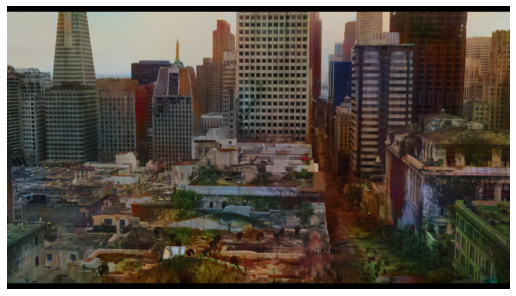

In [ ]:
plt.figure(figsize=(9, 9))
plt.axis("off")
plt.imshow(outimggan)

In [ ]:
!ffmpeg -r 60 -i ./his/%d_out.jpg -c:v libx264 -vf fps=30 -pix_fmt yuv420p out.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
import cv2

print(cv2.__version__)

4.1.2
